# Clustering: Wine Quality 

## Dataset Description

This dataset is the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. More about this dataset: https://archive.ics.uci.edu/ml/datasets/wine

#### Dataset Features
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash  
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

In [3]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sns.set_theme(palette='colorblind')

In [4]:
wine_quality_url = 'https://github.com/stubbsdiondra/PortfolioProjects/raw/main/Wine%20Quality%20Project/wine.csv'
columns = ['Quality','Alcohol','Malic_acid','Ash','Alcalinity',
          'Magnesium','Total_phenols','Flavanoids',
          'Nonflavanoid_phenols','Proanthocyanins',
          'Color_intensity','Hue','OD280_OD315',
          'Proline']

wine_df = pd.read_csv(wine_quality_url, names = columns, sep = ',', header = None)

In [5]:
wine_df.head()

Quality  Alcohol  Malic_acid   Ash  Alcalinity  Magnesium  Total_phenols  \
0        1    14.23        1.71  2.43        15.6        127           2.80   
1        1    13.20        1.78  2.14        11.2        100           2.65   
2        1    13.16        2.36  2.67        18.6        101           2.80   
3        1    14.37        1.95  2.50        16.8        113           3.85   
4        1    13.24        2.59  2.87        21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280_OD315  Proline  
0         3.92     1065  
1         3.40     1050  
2         3.17     1185  
3         3.45     1480  
4         2.93      735

## Clustering

Clustering is a random algorithm where we aim to learn the labels for each point while characterizing the classes at the same time. It is different from regression and classification in that it is unsupervised learning and there isn't a target variable.  As opposed to regression and classification, we can do clustering on data without splitting the data in test or train splits. Because of this, we can evaluate how good clusters are based on the actual data it learn from rather than test or train data.

### Clustering Question

#### Describe what question you'd be asking in applying clustering to this dataset.

What is the quality of each wine sample? The task is to predict the quality of the wine in this dataset without having to split the data in test/train models. I want to be able to do this by using the data I already have.

In [6]:
wine_df['Quality'].unique()

array([1, 2, 3], dtype=int64)

By looking at how many unique labels we have, we can see that the wine  data has 3 classes of wine quality. This means we'll be creating a Kmeans estimator object with 3 clusters.

I want to create some plots to identify relationships in the wine data set and to consider what my clustering algorithm sees.

In [7]:
wine_df.columns

Index(['Quality', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280_OD315', 'Proline'],
      dtype='object')

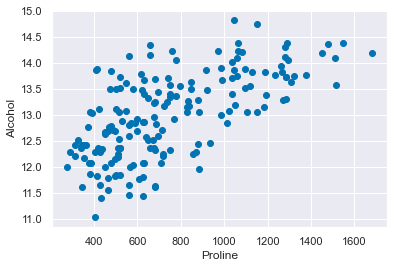

In [8]:
plt.scatter(wine_df['Proline'], wine_df['Alcohol'])
plt.xlabel("Proline")
plt.ylabel("Alcohol")
plt.show()

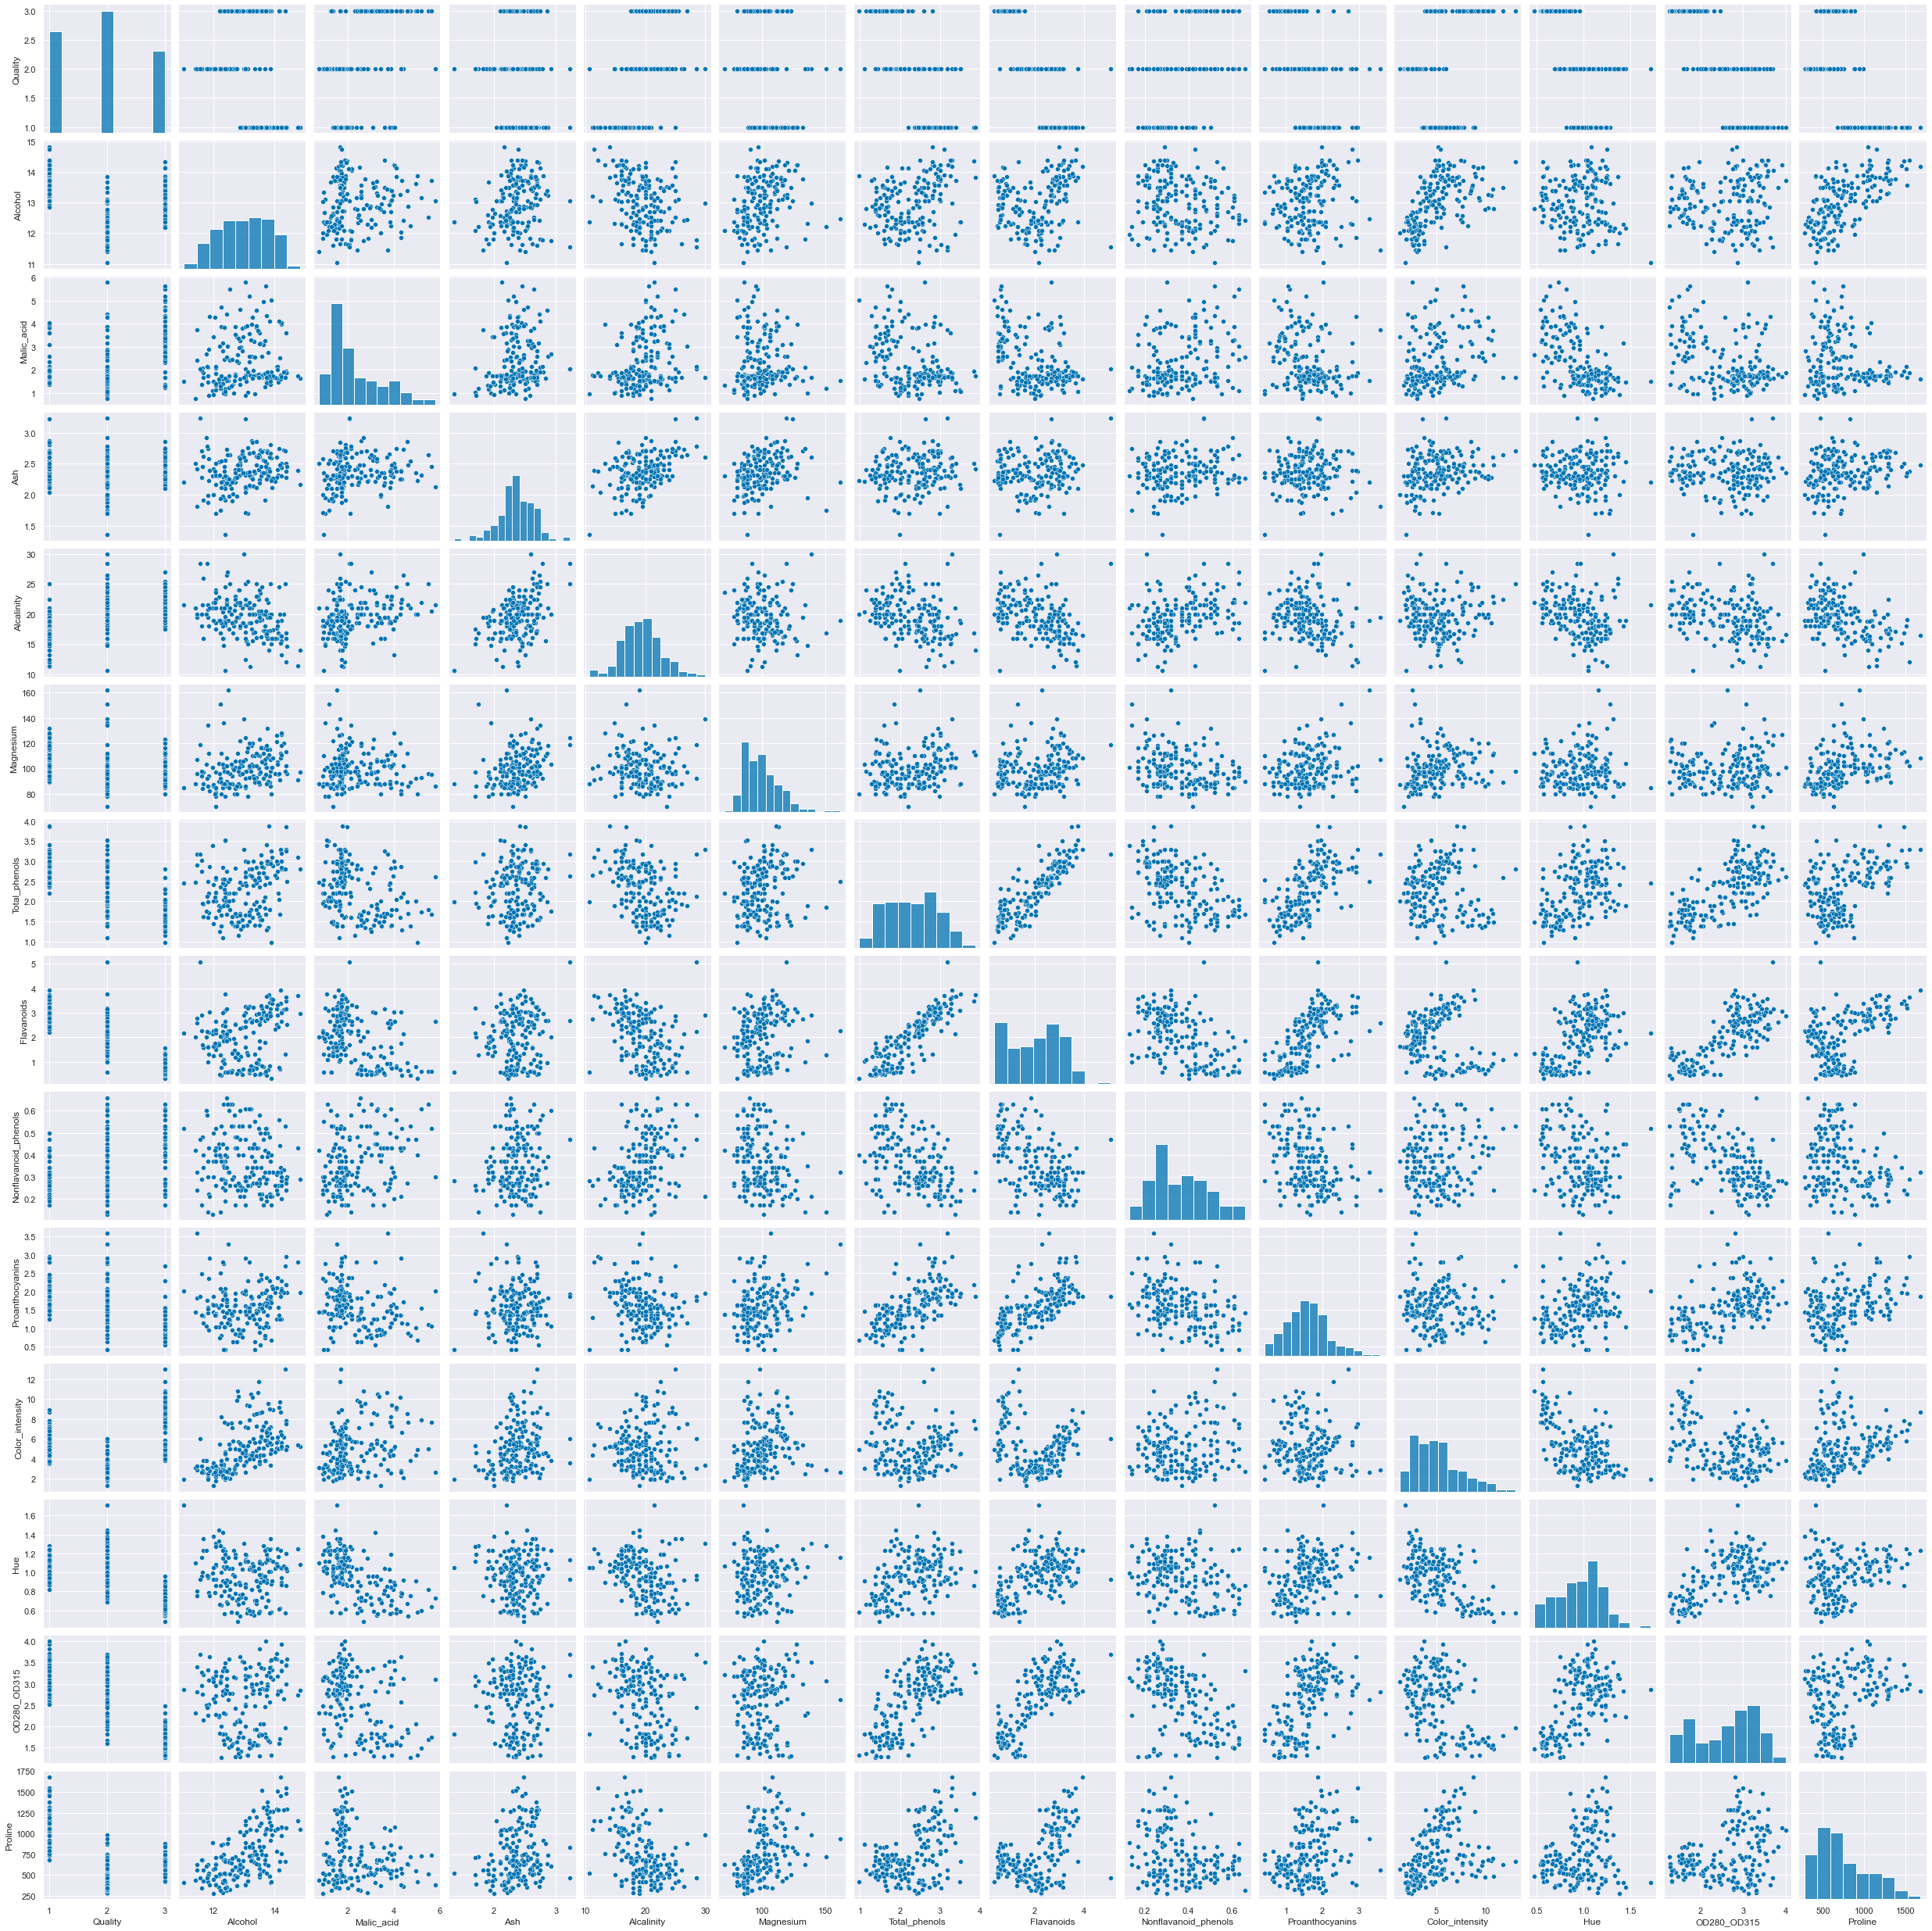

In [9]:
sns.pairplot(data=wine_df)

We can't tell much from these plots since there isn't a color distinction for the clusters.

In that case, I want to make this more appropiate for clustering and easier for understanding. Since a target variable isn't needed I can either pick the measurements out or drop the 'Quality' column.

I'm going to drop the 'Quality' column.

In [10]:
wine_X = wine_df.drop(columns=['Quality'])
wine_X

Alcohol  Malic_acid   Ash  Alcalinity  Magnesium  Total_phenols  \
0      14.23        1.71  2.43        15.6        127           2.80   
1      13.20        1.78  2.14        11.2        100           2.65   
2      13.16        2.36  2.67        18.6        101           2.80   
3      14.37        1.95  2.50        16.8        113           3.85   
4      13.24        2.59  2.87        21.0        118           2.80   
..       ...         ...   ...         ...        ...            ...   
173    13.71        5.65  2.45        20.5         95           1.68   
174    13.40        3.91  2.48        23.0        102           1.80   
175    13.27        4.28  2.26        20.0        120           1.59   
176    13.17        2.59  2.37        20.0        120           1.65   
177    14.13        4.10  2.74        24.5         96           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280_OD315  Proline  
0           3.92     1065  
1           3.40     1050  
2           3.17     1185  
3           3.45     1480  
4           2.93      735  
..           ...      ...  
173         1.74      740  
174         1.56      750  
175         1.56      835  
176         1.62      840  
177         1.60      560  

[178 rows x 13 columns]

## KMeans Estimator
### Apply Kmeans using the known, correct number of clusters, .

Early we saw that there are 3 classes for quality. I'm going to create a Kmeans estimator object with 3 clusters, since the data has three qualities of wine.

In [11]:
km = KMeans(n_clusters=3)

## Fit and Predict

In [12]:
km.fit_predict(wine_X)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

In [13]:
wine_df['Quality'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

This gives the labeled cluster by index of each point. It cannot match the groups to the qualities of the wine.

I'm going to save them to a variable.

In [14]:
cluster_assignments = km.fit_predict(wine_X)
cluster_assignments

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

### Looking at the parameters

In [15]:
km.get_params(deep=True)

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

### What do they mean?

'algorithm' tells us the K-means algorithm to use, the one we used is 'auto'. Documentation says that "auto" and "full" are deprecated which explains 'n_jobs'.

'copy_x' set to True means that the original data has not been modified. 

'init': 'k-means++' means it selects initial cluster centroids using sampling based on an empirical probability distribution of the points

'max_iter' set to 300 just means that the maximum number of iterations of the k-means algorithm for a single run is 300.

'n_clusters': 3, 3 clusters were set to be formed as we;l as the number of centroids

'n_init': 10', the k-means algorith will be run with different centroid sees 10 times

'random_state': None, Determines random number generation for centroid initialization.

'tol': 0.0001, relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence

'verbose': 0, verbosity mode.

## Visualization

I'm going to add the predictions as a new column to the original wine_df and make a pairplot with the points colored by what the clustering learned.

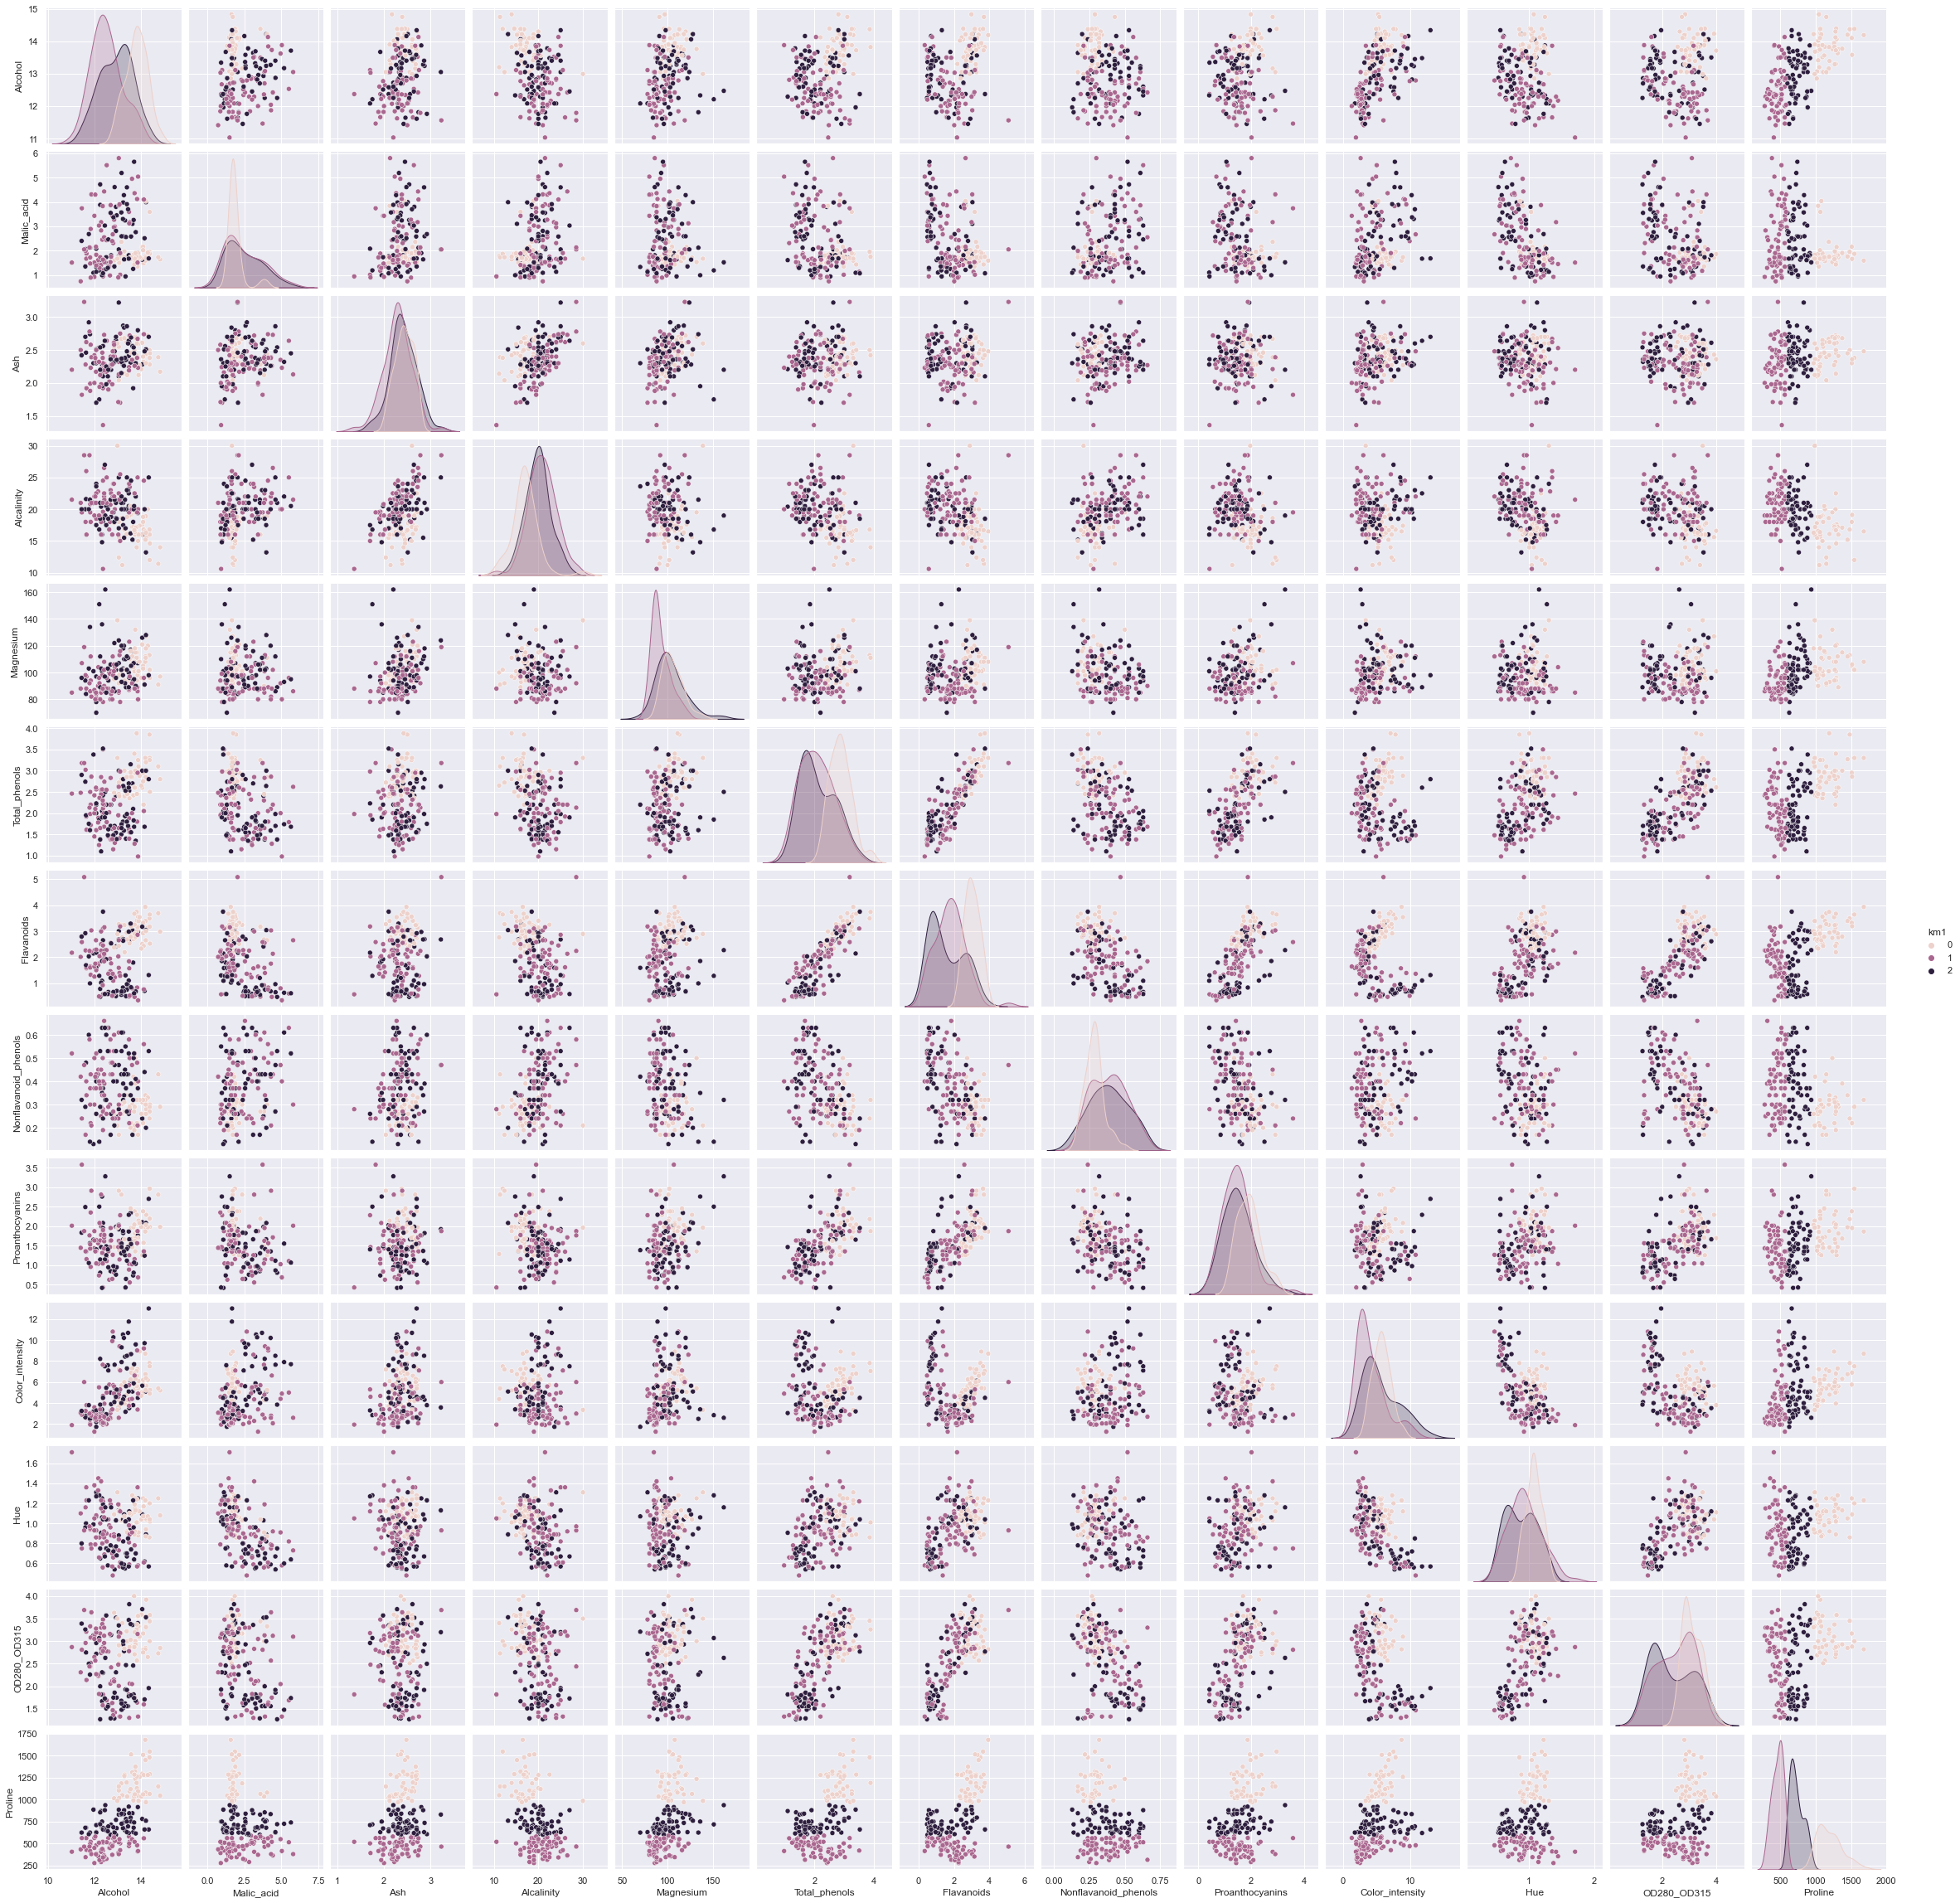

In [16]:
wine_df['km1'] = cluster_assignments
sns.pairplot(data=wine_df.drop(columns=['Quality']), hue ='km1')

In [17]:
wine_df['km2'] = km.fit_predict(wine_X)

In [18]:
wine_df.head()

Quality  Alcohol  Malic_acid   Ash  Alcalinity  Magnesium  Total_phenols  \
0        1    14.23        1.71  2.43        15.6        127           2.80   
1        1    13.20        1.78  2.14        11.2        100           2.65   
2        1    13.16        2.36  2.67        18.6        101           2.80   
3        1    14.37        1.95  2.50        16.8        113           3.85   
4        1    13.24        2.59  2.87        21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280_OD315  Proline  km1  km2  
0         3.92     1065    0    1  
1         3.40     1050    0    1  
2         3.17     1185    0    1  
3         3.45     1480    0    1  
4         2.93      735    2    2

Picking out the measurement columns for plotting

In [19]:
wine_df.columns

Index(['Quality', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280_OD315', 'Proline',
       'km1', 'km2'],
      dtype='object')

In [20]:
measurement_cols = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280_OD315', 'Proline']

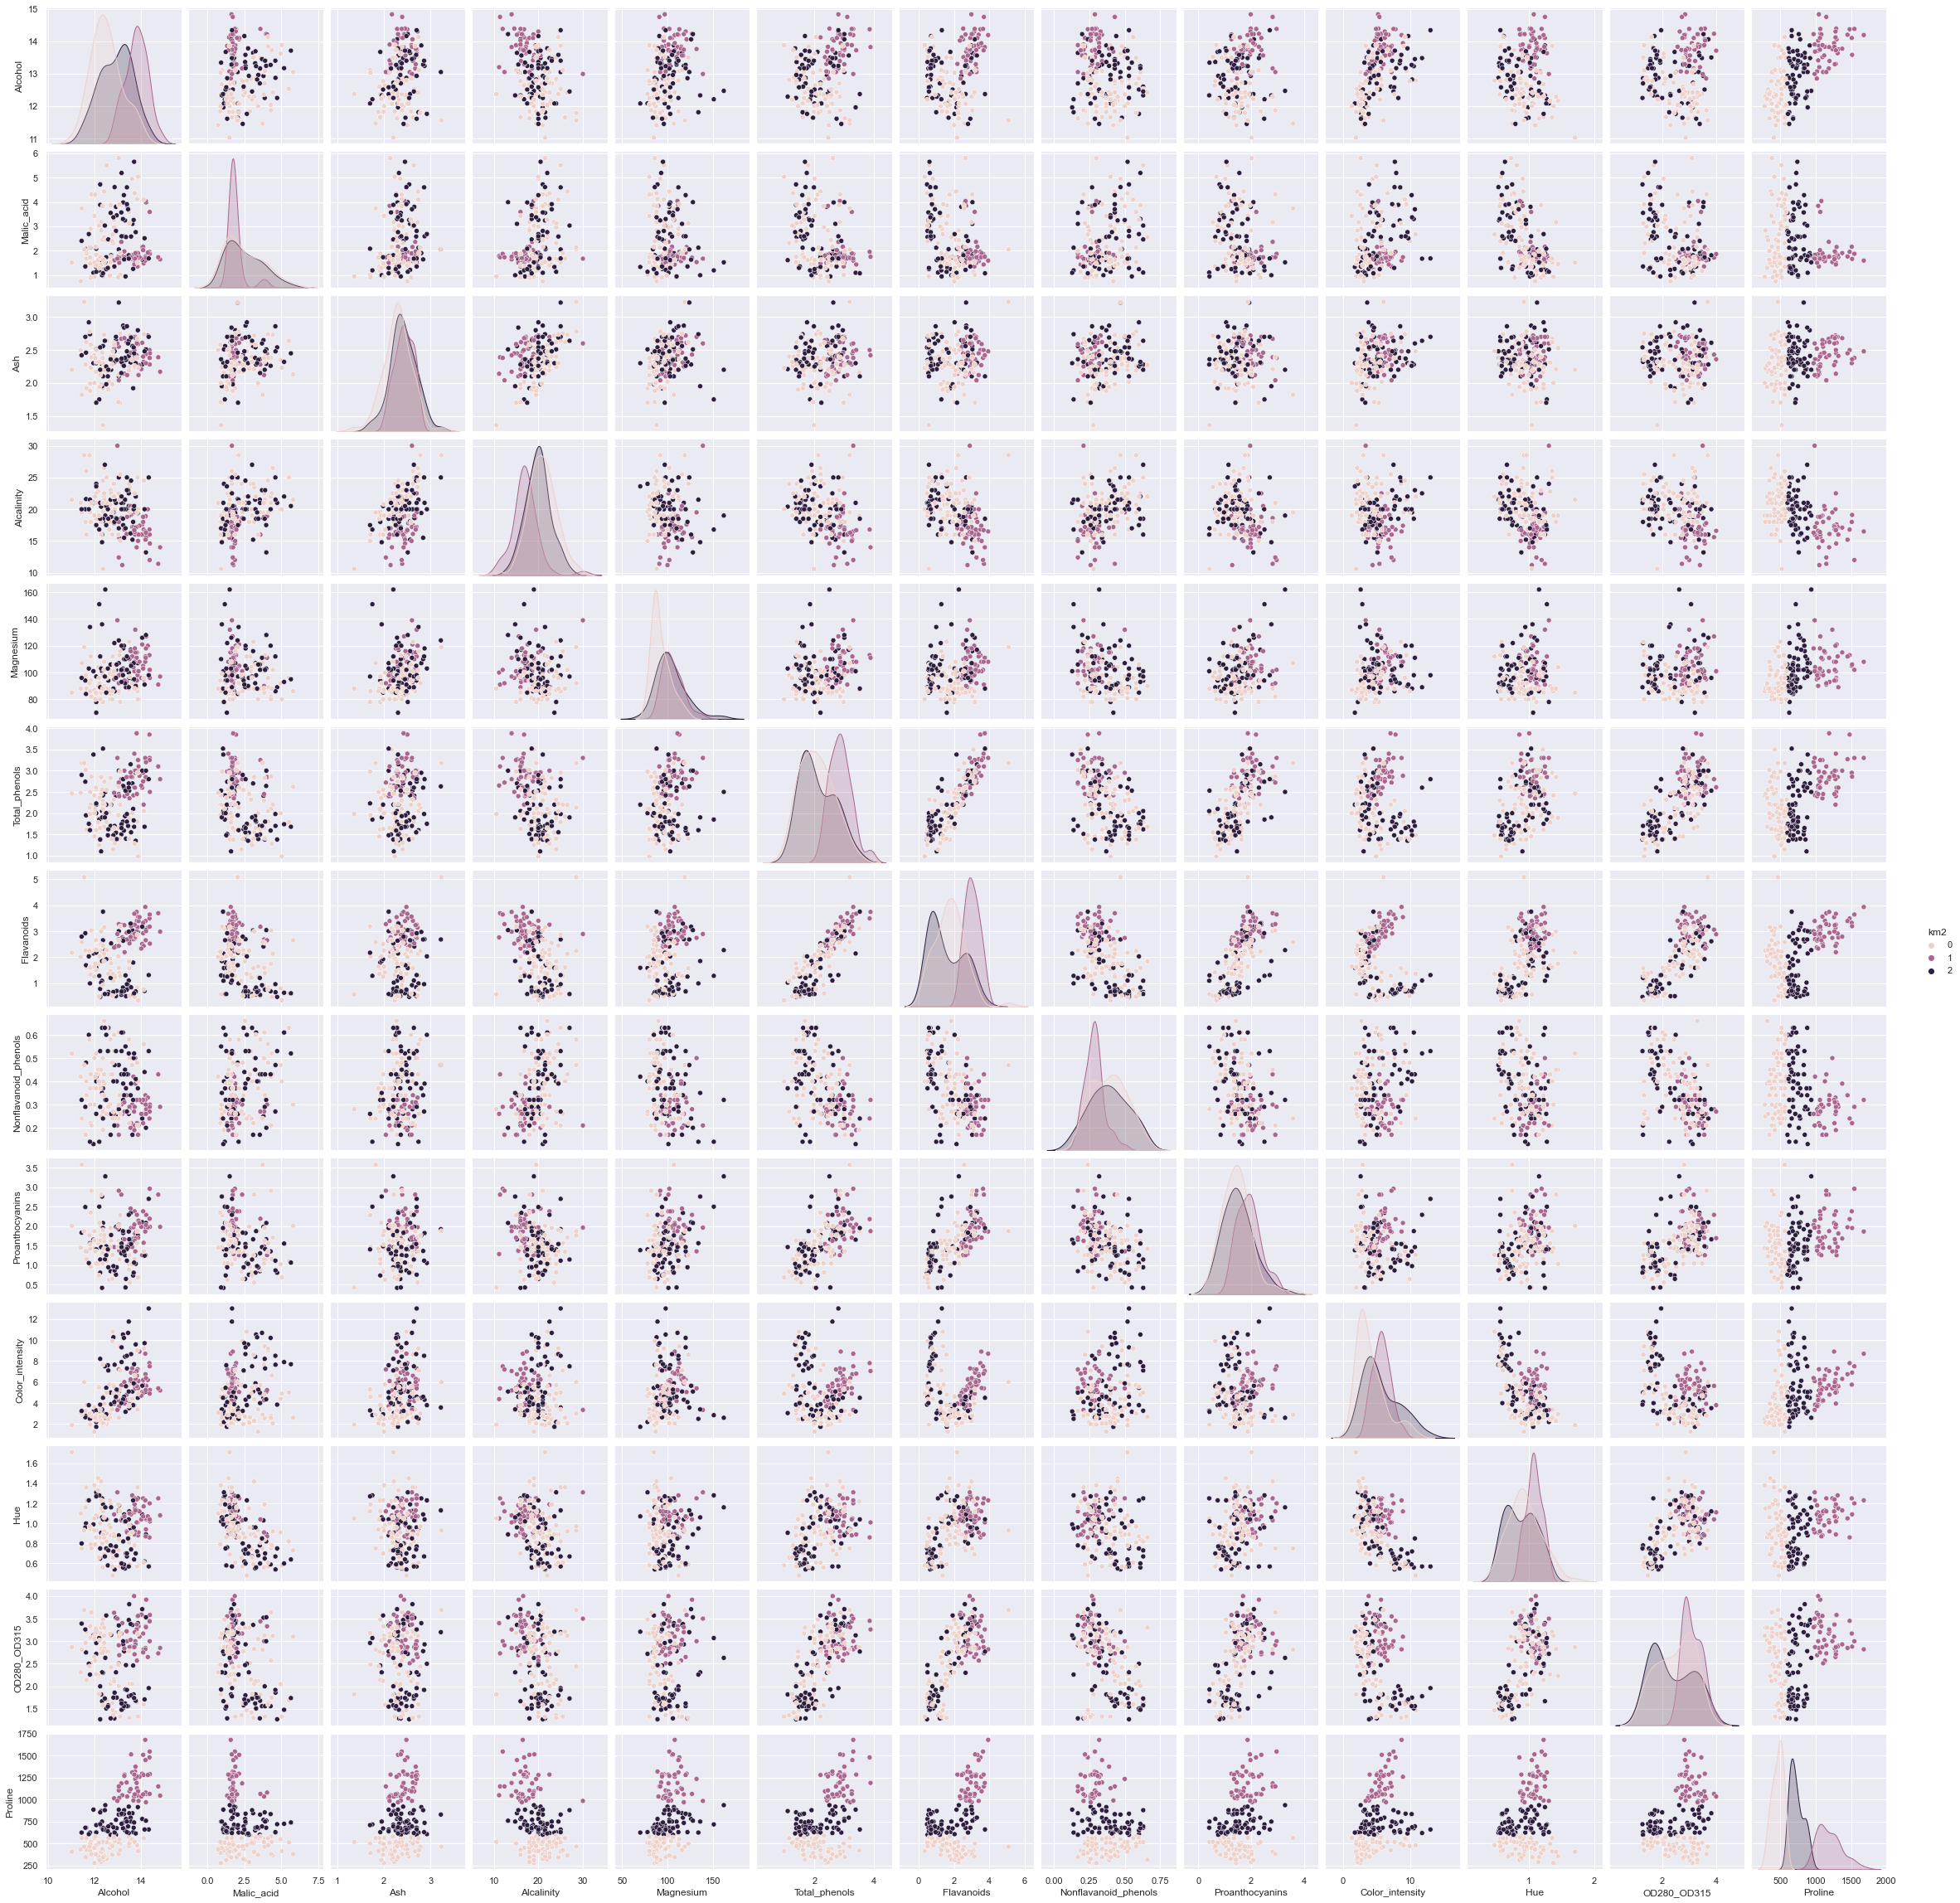

In [21]:
sns.pairplot(wine_df[measurement_cols+['km2']],hue='km2')

## Evaluation

Fitting the model woth correct number of clusters

In [22]:
km3 = KMeans(n_clusters=3)
km3.fit(wine_X)

KMeans(n_clusters=3)

In [23]:
metrics.silhouette_score(wine_X, km3.labels_)

0.571138193786884

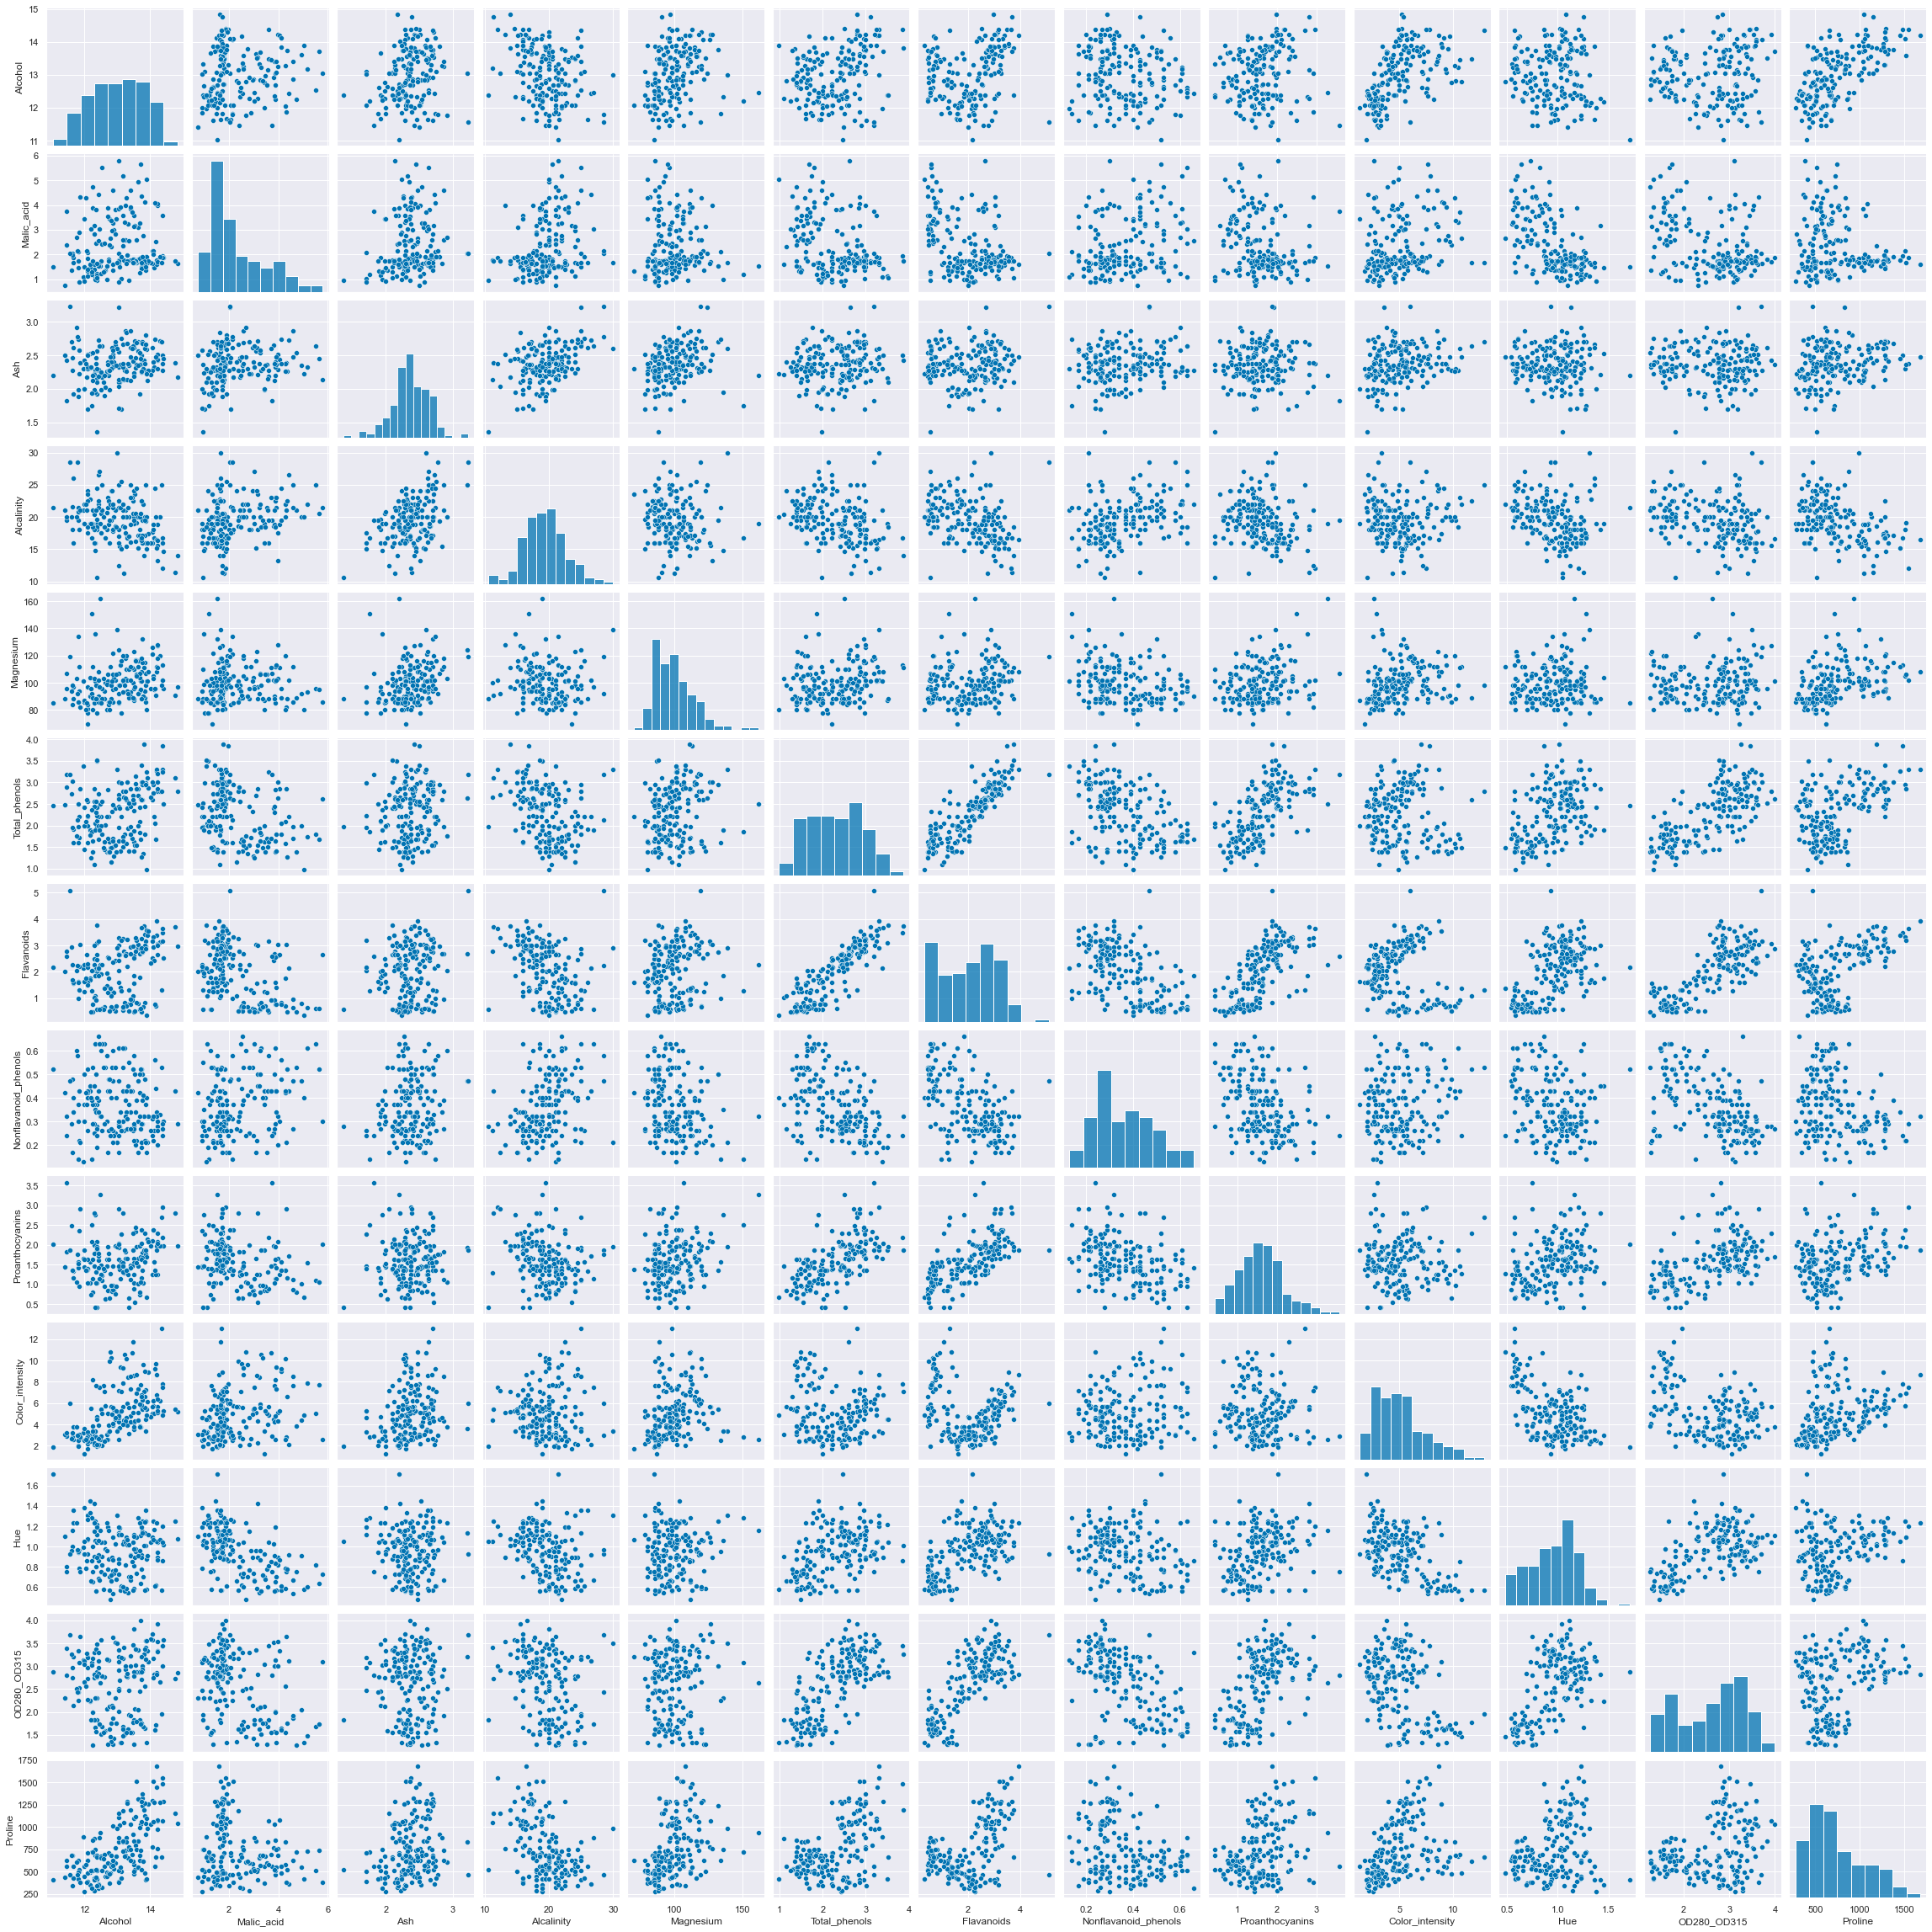

In [24]:
sns.pairplot(wine_X)

#### Using a clustering metric that uses the ground truth labels

In [25]:
metrics.mutual_info_score(wine_df['Quality'],km3.labels_)

0.4657066646034707

In [26]:
metrics.adjusted_mutual_info_score(wine_df['Quality'],km3.labels_)

0.42268666427661217

## Discussion

Clustering is an unsupervised machine learning that groups data on the basis of similairities. In the above analysis, we provide the model with features and it learns the label and characterizes the class of each point from the data provided.

Most of the plots show that the clusters are overlapping. When we look at the plots between 'Proline' and other features, we do see less overlap. We can see the distinct clusters though they are not far apart. 

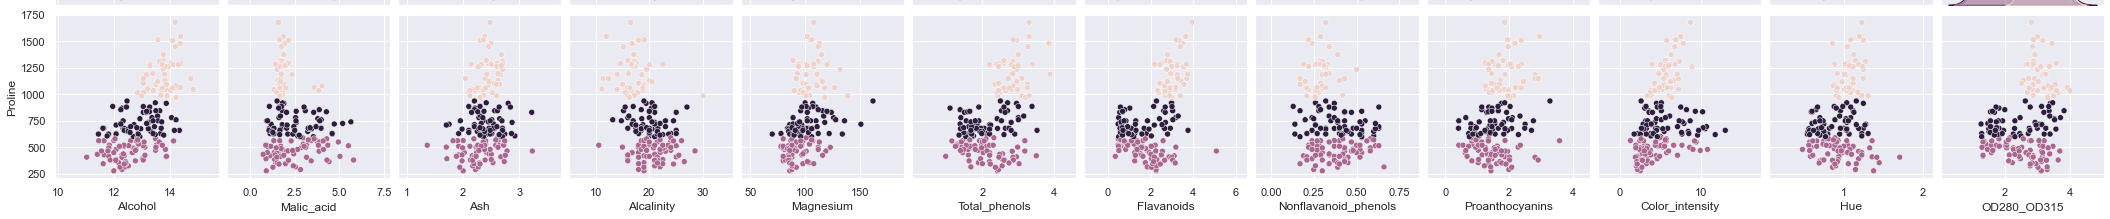

The images are a little small. A closer look as some of the features vs Proline are below.

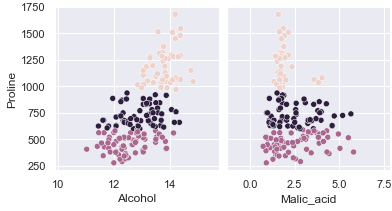

The purpose of a silhoutte score is to calculate the goodness of a clustering model. It measures the separation distance between clusters. A silhoutte score of 1 means that clusters are well apart from each other and clearly distinguished. A silhoutte score of 0 means that the distance between clusters aren't significance.

At K=3 clusters, the silhoutte score is 0.571138193786884. This score looks pretty good. The distance between the clusters in most of the subplots are almost negligible. Between Proline and the other features, there is a bit of distance between the clusters.

##### Does this clustering work better or worse than expected based on the classification performance?

This clustering works pretty good but not as good as I expected based on the classification performance. The classification model, had an accuracy score of ~ 94% meaning that the model worked well and the parameters fit the data. I was expecting the silhouette score to be a little closer to 1.

### Using 2 different numbers (one higher, one lower) of clusters

In [29]:
km2 = KMeans(n_clusters=2)
km2.fit(wine_X)

KMeans(n_clusters=2)

In [30]:
metrics.silhouette_score(wine_X, km2.labels_)

0.6568536504294317

In [31]:
metrics.mutual_info_score(wine_df['Quality'],km2.labels_)

0.36295243685914913

The silhouette score fits better for 2 clusters. It is closer to one meaning that the best number of clusters for this dats is 2, since we get a better score than we did for 3 clusters and 4 clusters. With K=2, the clusters are more distanced from each other and more distinguishable than when there are 3 or 4 clusters.

In [32]:
km4 = KMeans(n_clusters=4)
km4.fit(wine_X)

KMeans(n_clusters=4)

In [33]:
metrics.silhouette_score(wine_X, km4.labels_)

0.5620323449580346

In [34]:
metrics.mutual_info_score(wine_df['Quality'],km4.labels_)

0.4644628506130969

The silhouette score fits worse for 4 clusters.

There is no reasonable explanation for more clusters than there are classes in this dataset since the silhouette score gets slightly worse as we increase the number of clusters. However, the scores are not terrible nore close to 0. It's just not better than 2 clusters.

In [35]:
km5 = KMeans(n_clusters=5)
km5.fit(wine_X)
metrics.silhouette_score(wine_X, km5.labels_)

0.5489993239795681

In [36]:
km6 = KMeans(n_clusters=6)
km6.fit(wine_X)
metrics.silhouette_score(wine_X, km6.labels_)

0.5656413100386375

In [37]:
km7 = KMeans(n_clusters=7)
km7.fit(wine_X)
metrics.silhouette_score(wine_X, km7.labels_)

0.5616196384056887

In [38]:
km8 = KMeans(n_clusters=8)
km8.fit(wine_X)
metrics.silhouette_score(wine_X, km8.labels_)

0.5398971441034123